In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [2]:
import pandas as pd

# Load the processed data
#data_clean = pd.read_pickle("../data/processed/data_clean.pkl")
# Or if you saved as CSV:
data_clean = pd.read_csv("E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\processed")

# Now you can use data_clean for your EDA
print(data_clean.head())


   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0   32       0                    2              2              5   
1   47       0                    2              2              5   
2   40       0                    1              1              5   
3   41       0                    0              0              3   
4   60       0                    2              2              5   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                           4             55  ...   
1                           4             42  ...   
2                      

In [3]:
data_clean.corr

<bound method DataFrame.corr of       Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       0                    2              2              5   
1      47       0                    2              2              5   
2      40       0                    1              1              5   
3      41       0                    0              0              3   
4      60       0                    2              2              5   
...   ...     ...                  ...            ...            ...   
1113   27       1                    3              0              5   
1114   37       0                    1              2              1   
1115   50       0                    3              1              1   
1116   34       1                    3              2              0   
1117   24       1                    1              2              5   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                           2    

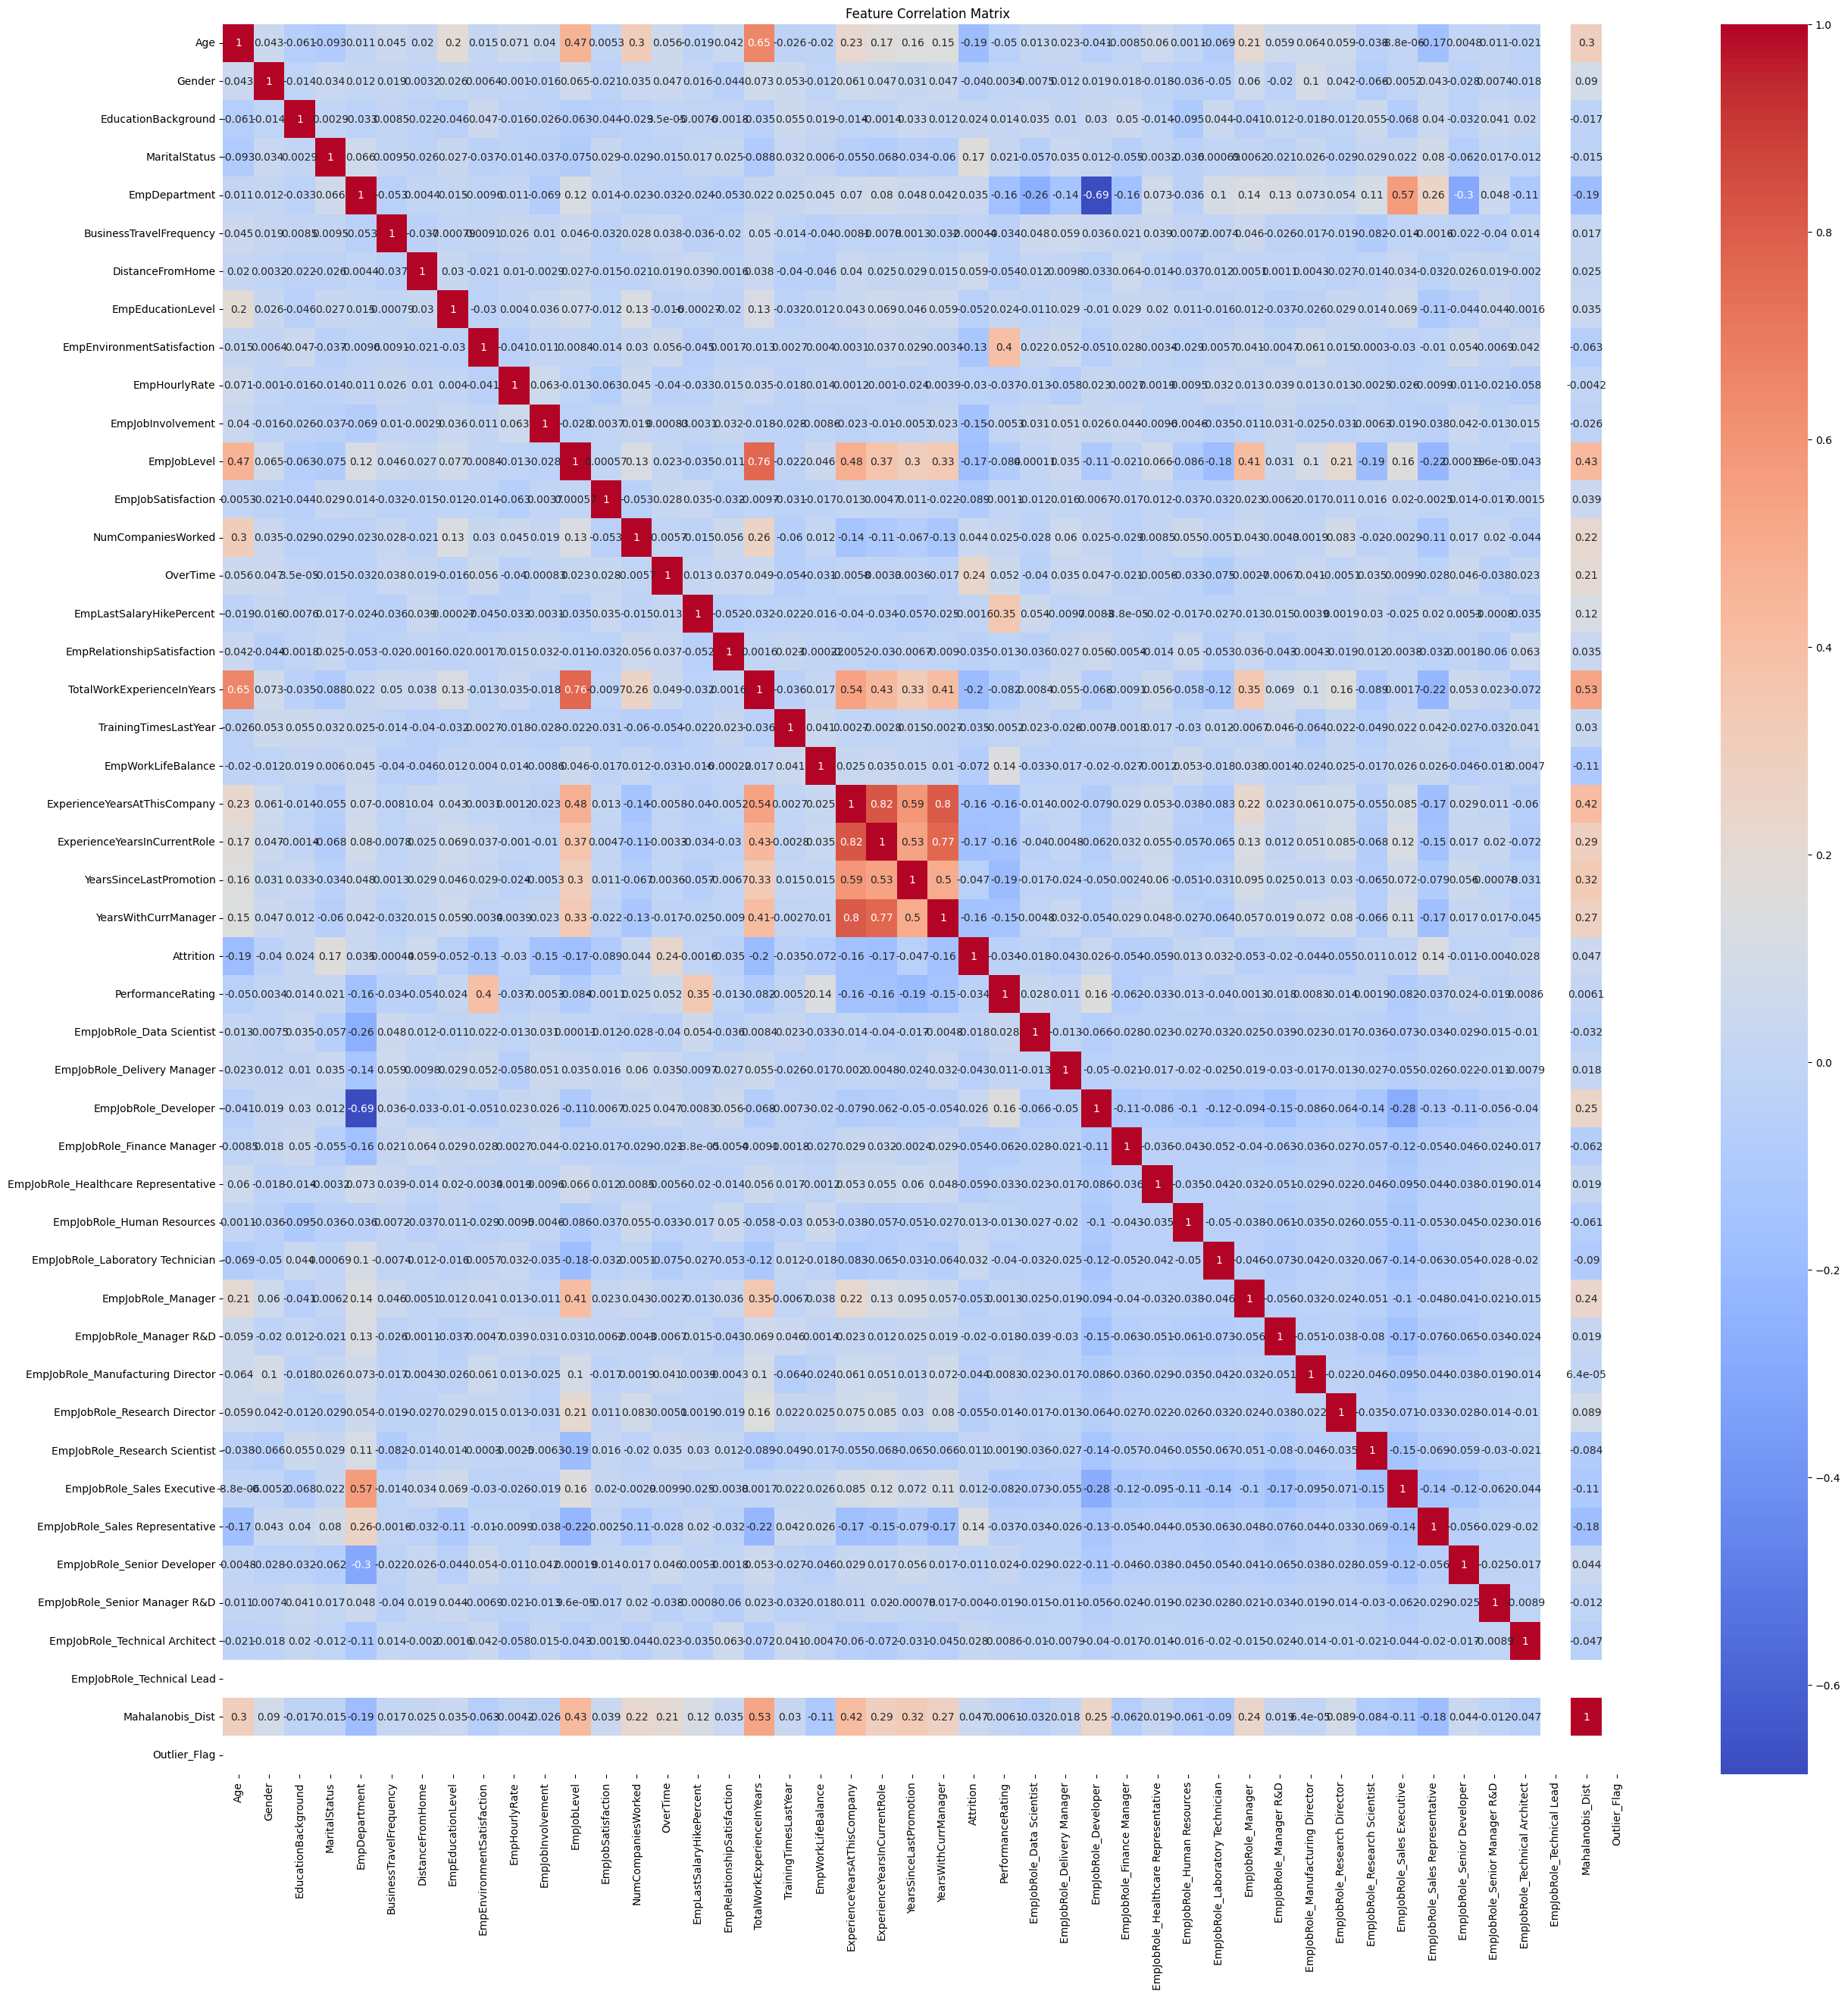

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(data_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = data_clean.corr()

# Get correlation of all features with the target column 'PerformanceRating'
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)

# Display the top positively and negatively correlated features
print("🔹 Features with Highest Correlation to PerformanceRating:\n", target_corr)


🔹 Features with Highest Correlation to PerformanceRating:
 PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395173
EmpLastSalaryHikePercent                0.346046
EmpJobRole_Developer                    0.158130
EmpWorkLifeBalance                      0.141066
OverTime                                0.051684
EmpJobRole_Data Scientist               0.027688
NumCompaniesWorked                      0.025179
EmpJobRole_Senior Developer             0.023805
EmpEducationLevel                       0.023763
MaritalStatus                           0.020791
EducationBackground                     0.014027
EmpJobRole_Delivery Manager             0.010854
EmpJobRole_Technical Architect          0.008643
EmpJobRole_Manufacturing Director       0.008325
Mahalanobis_Dist                        0.006065
Gender                                  0.003404
EmpJobRole_Research Scientist           0.001941
EmpJobRole_Manager                      0.001348
EmpJobSati

Identified Continuous Columns for Normality Checks: ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Mahalanobis_Dist']

Column: Age
Shapiro-Wilk test p-value: 0.0000


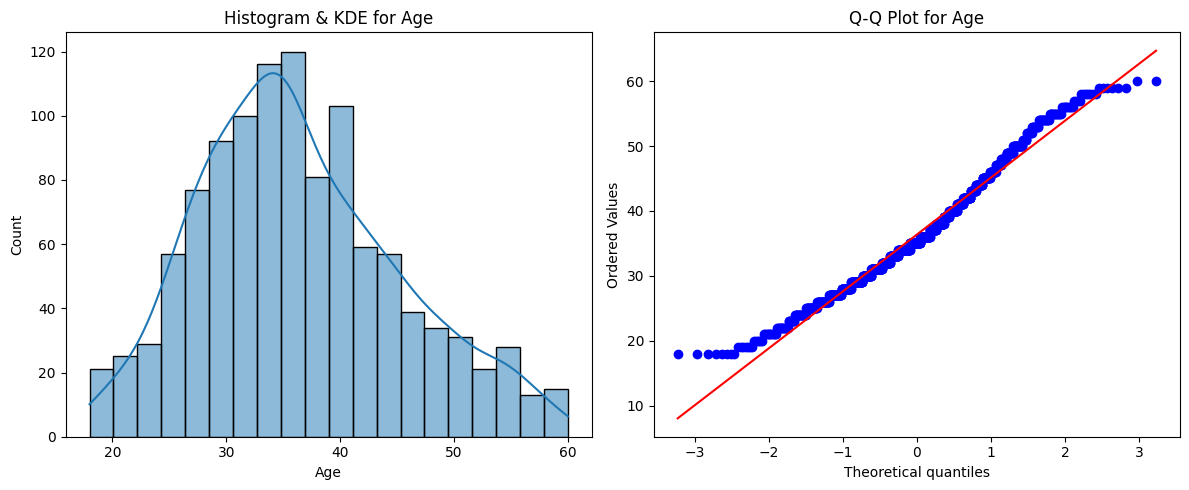


Column: DistanceFromHome
Shapiro-Wilk test p-value: 0.0000


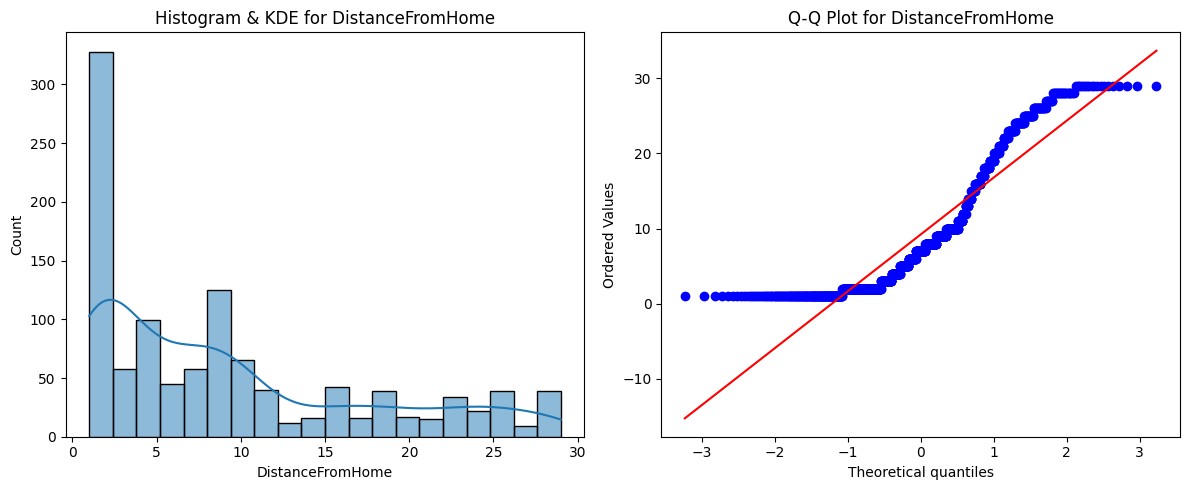


Column: EmpHourlyRate
Shapiro-Wilk test p-value: 0.0000


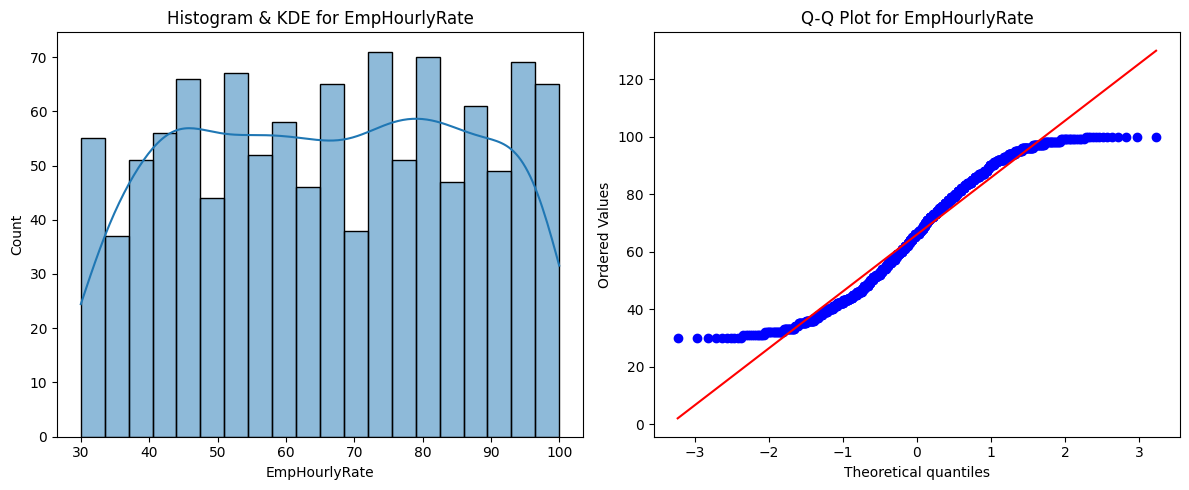


Column: EmpLastSalaryHikePercent
Shapiro-Wilk test p-value: 0.0000


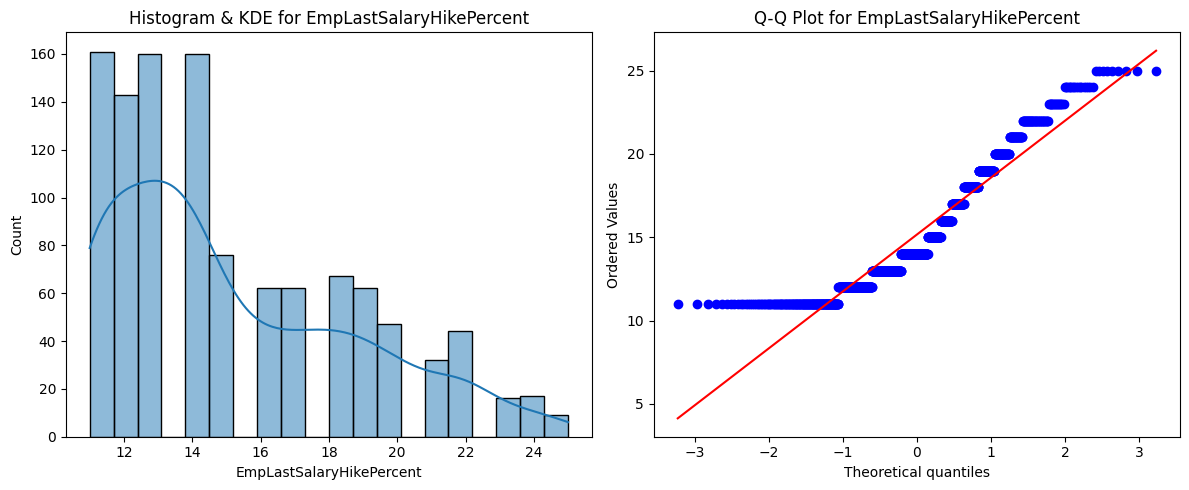


Column: TotalWorkExperienceInYears
Shapiro-Wilk test p-value: 0.0000


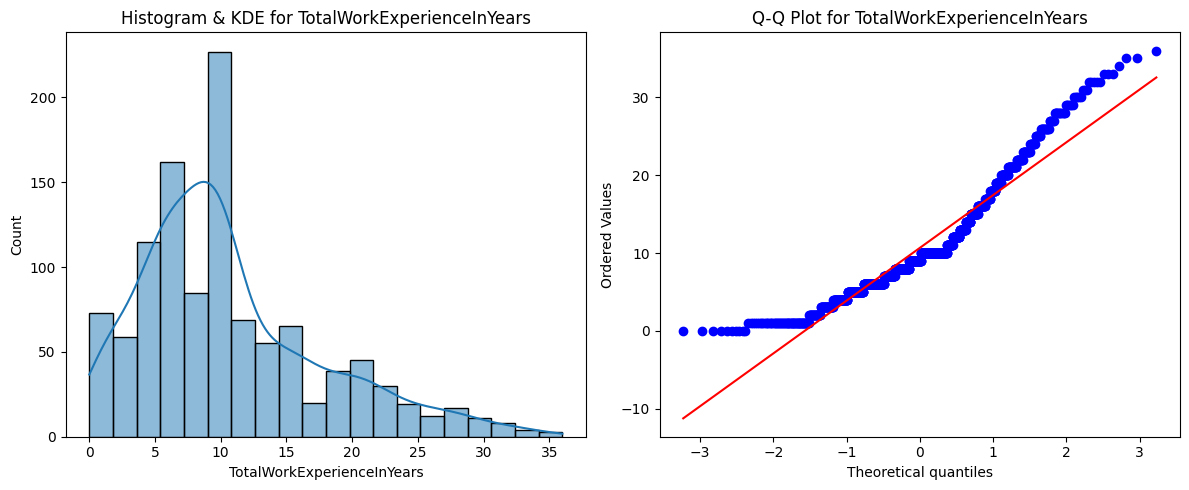


Column: ExperienceYearsAtThisCompany
Shapiro-Wilk test p-value: 0.0000


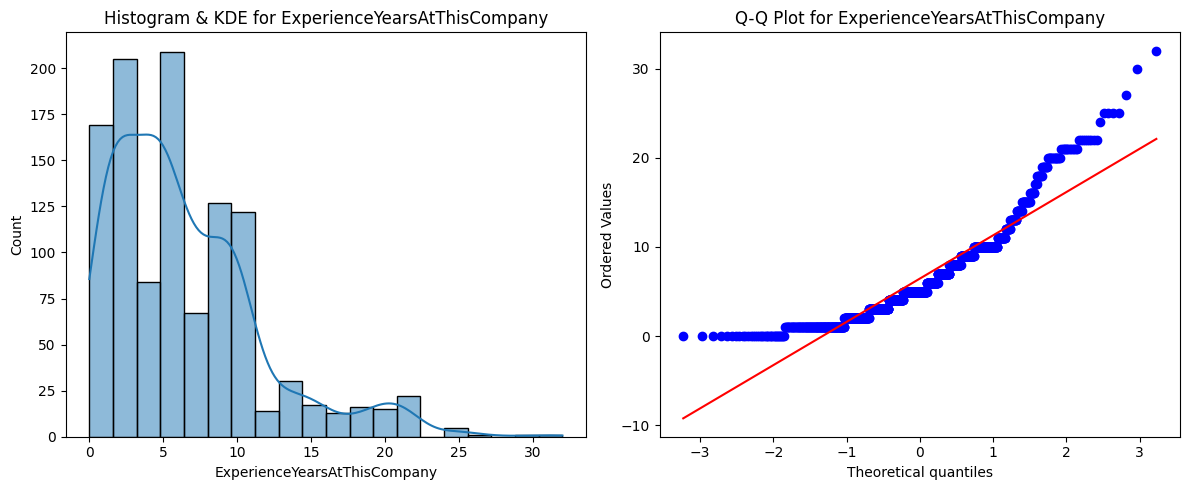


Column: ExperienceYearsInCurrentRole
Shapiro-Wilk test p-value: 0.0000


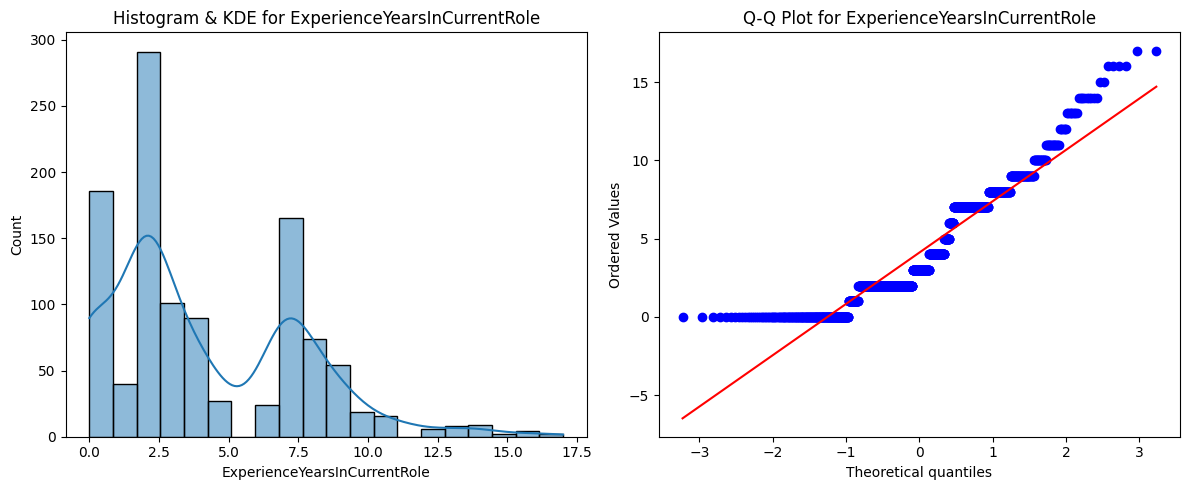


Column: YearsSinceLastPromotion
Shapiro-Wilk test p-value: 0.0000


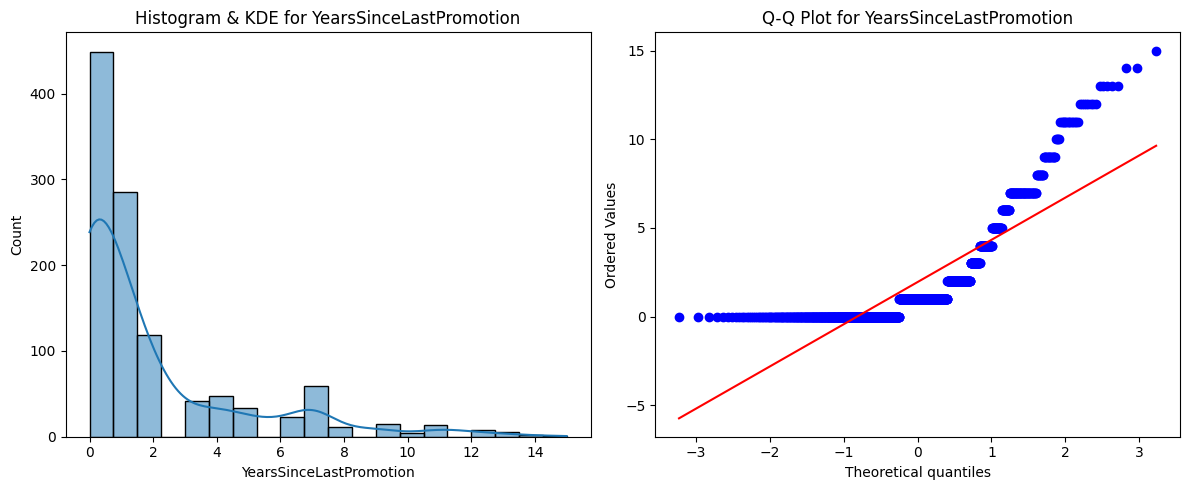


Column: YearsWithCurrManager
Shapiro-Wilk test p-value: 0.0000


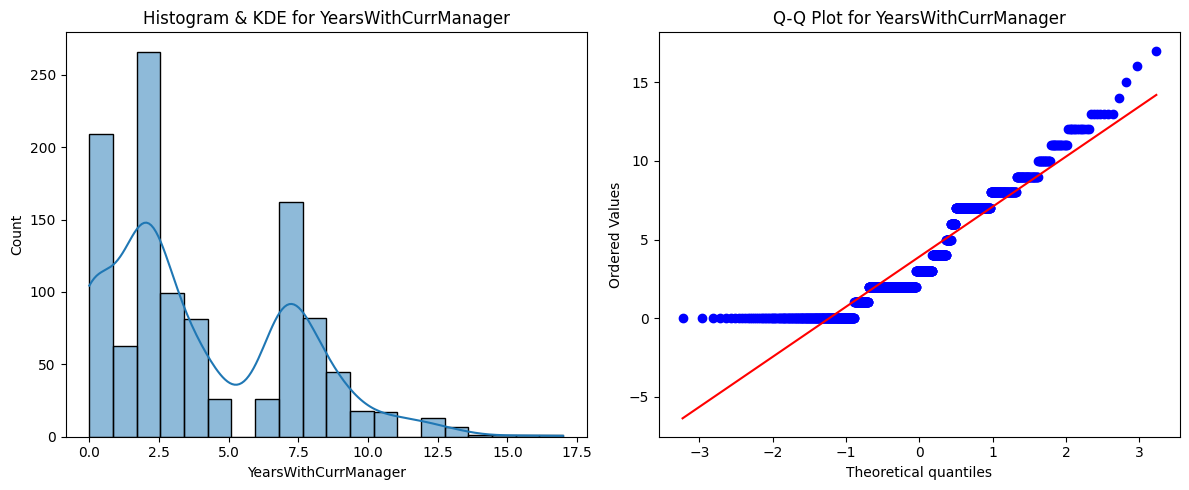


Column: Mahalanobis_Dist
Shapiro-Wilk test p-value: 0.0000


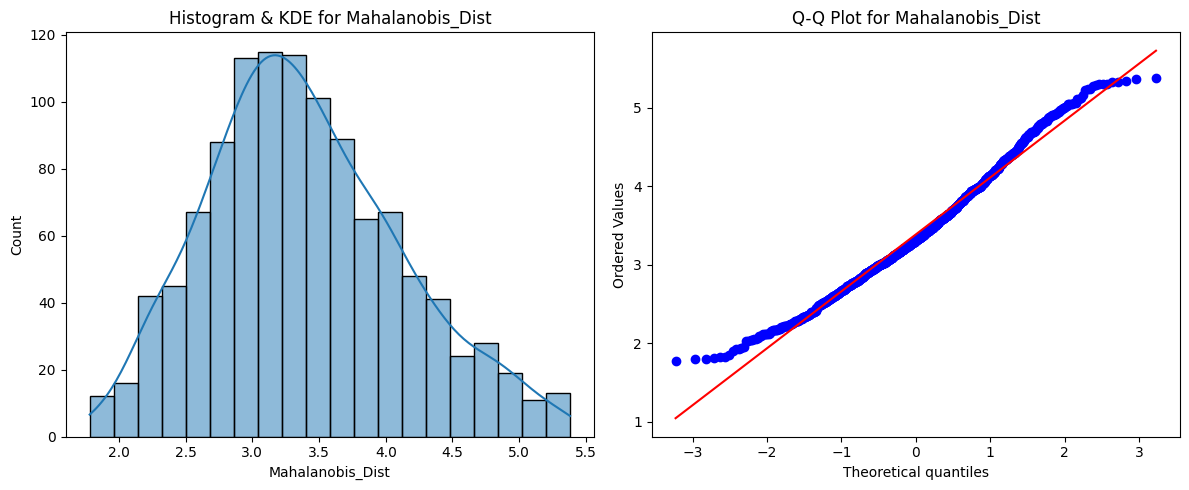


Checking Skewness and Applying Transformations:

Age - Original Skewness: 0.4337
Age does not require transformation (skewness within acceptable limits).

DistanceFromHome - Original Skewness: 0.9520
After transformation, DistanceFromHome - New Skewness: -0.0047


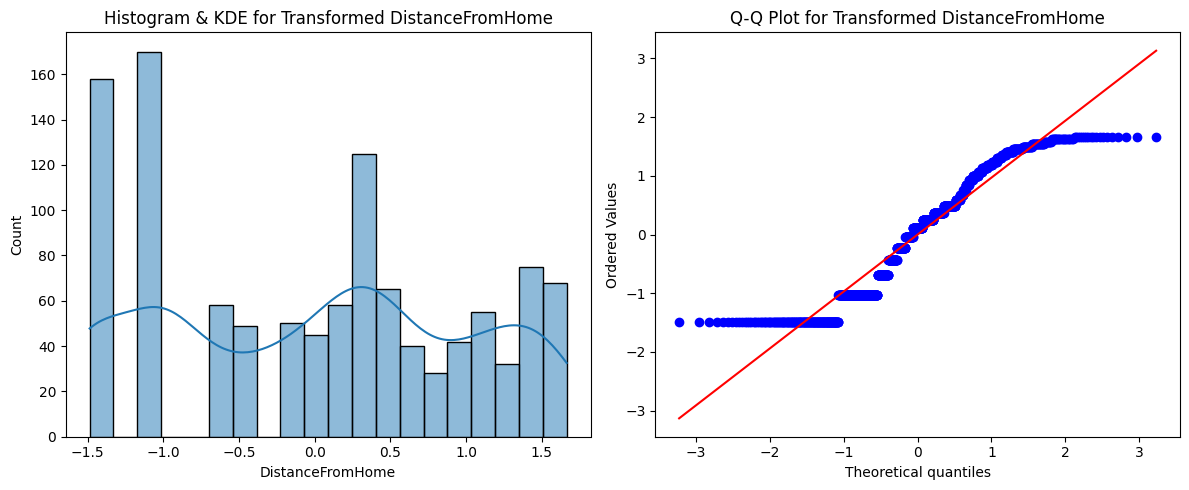


EmpHourlyRate - Original Skewness: -0.0284
EmpHourlyRate does not require transformation (skewness within acceptable limits).

EmpLastSalaryHikePercent - Original Skewness: 0.8003
After transformation, EmpLastSalaryHikePercent - New Skewness: 0.1088


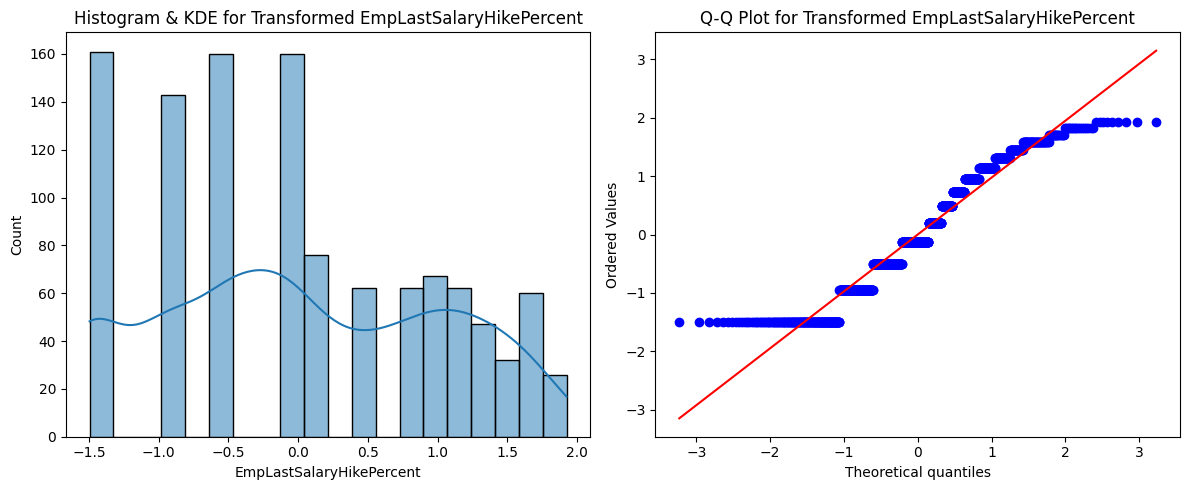


TotalWorkExperienceInYears - Original Skewness: 1.0242
After transformation, TotalWorkExperienceInYears - New Skewness: -0.0129


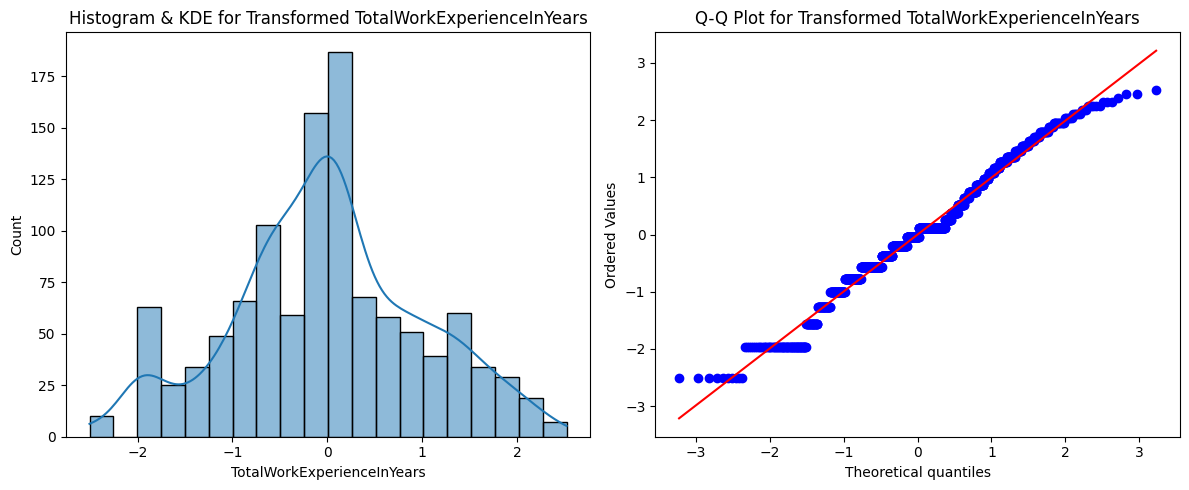


ExperienceYearsAtThisCompany - Original Skewness: 1.3614
After transformation, ExperienceYearsAtThisCompany - New Skewness: -0.0209


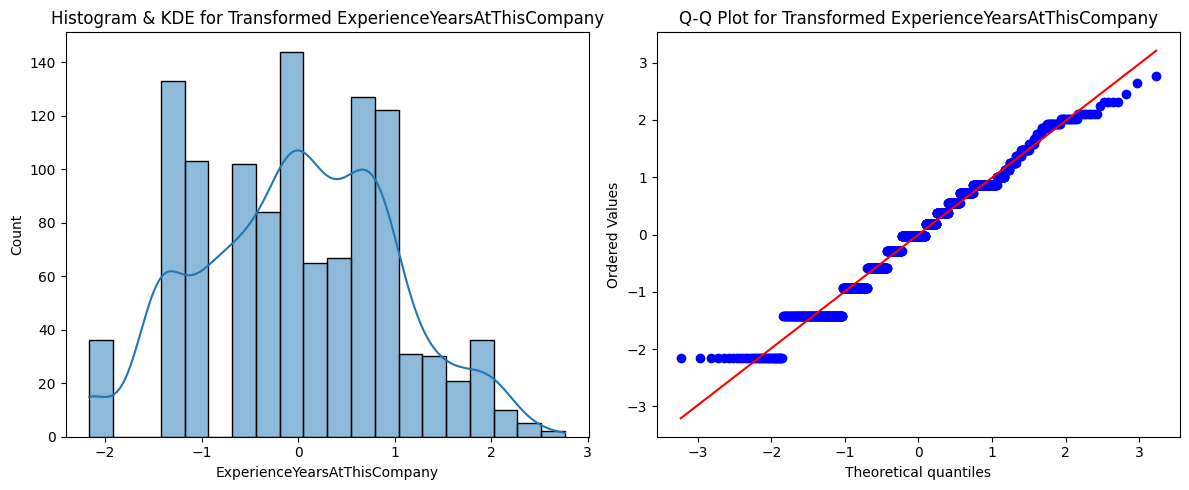


ExperienceYearsInCurrentRole - Original Skewness: 0.8285
After transformation, ExperienceYearsInCurrentRole - New Skewness: -0.0668


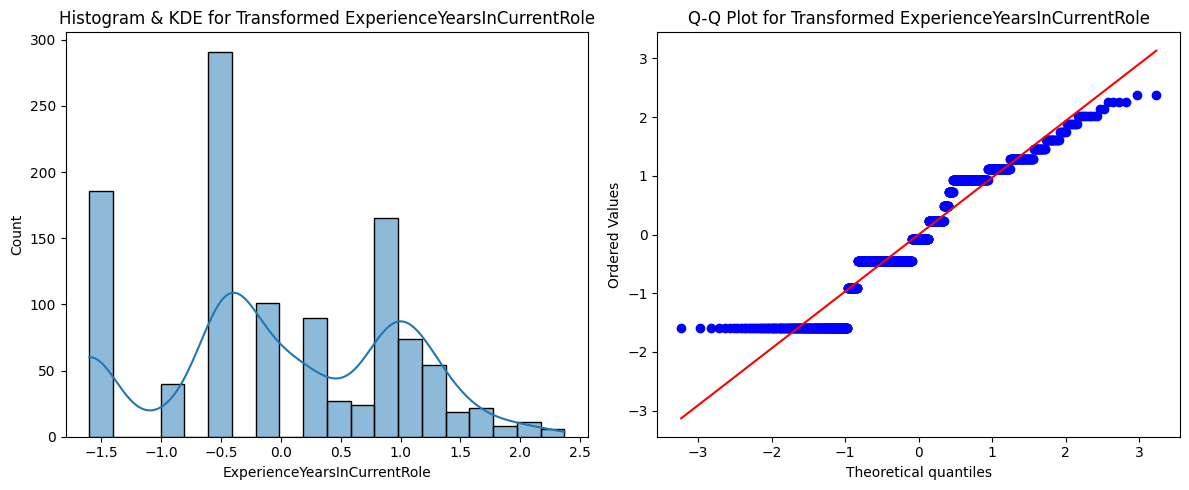


YearsSinceLastPromotion - Original Skewness: 1.9250
After transformation, YearsSinceLastPromotion - New Skewness: 0.2097


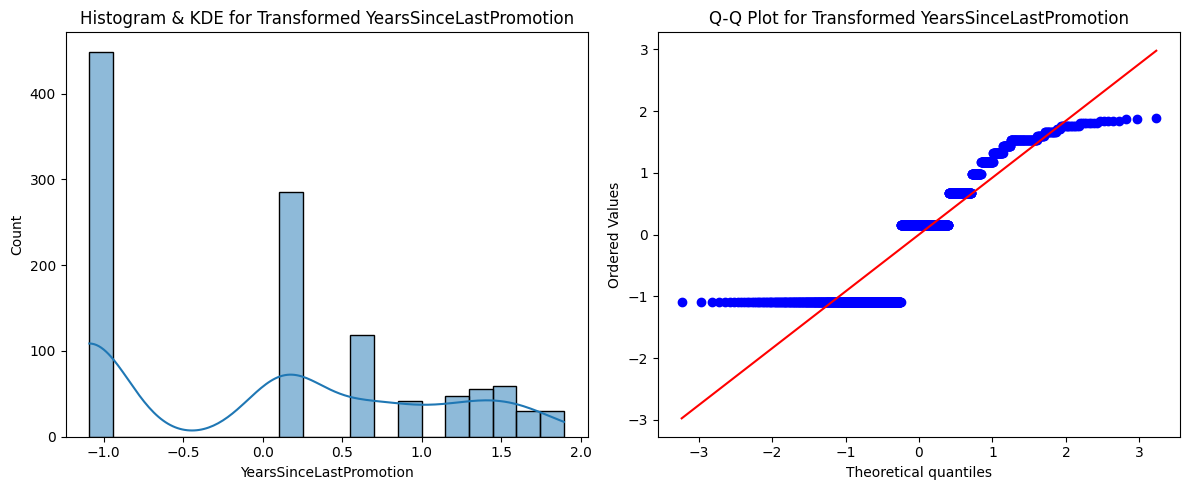


YearsWithCurrManager - Original Skewness: 0.7000
After transformation, YearsWithCurrManager - New Skewness: -0.0758


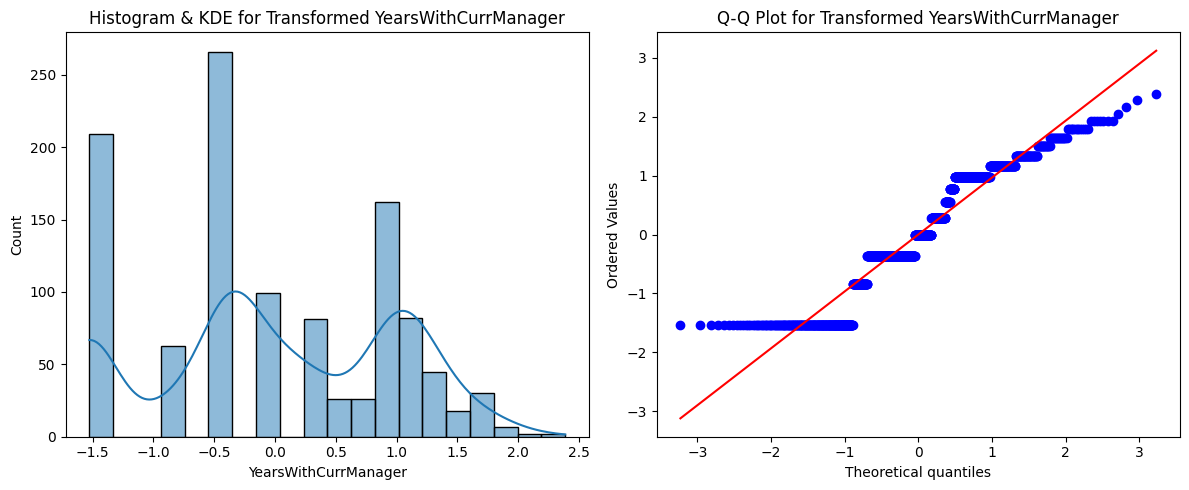


Mahalanobis_Dist - Original Skewness: 0.3881
Mahalanobis_Dist does not require transformation (skewness within acceptable limits).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer


# Step 1: Identify Continuous Columns
# We'll define continuous columns as those numeric columns with more than a threshold number of unique values.
def is_continuous(col, threshold=10):
    # Check if the column is numeric and has more than 'threshold' unique values.
    return data_clean[col].dtype in [np.int64, np.float64] and data_clean[col].nunique() > threshold

# Build a list of continuous columns
continuous_columns = [col for col in data_clean.columns if is_continuous(col)]
print("Identified Continuous Columns for Normality Checks:", continuous_columns)

# Step 2: Normality Checks on Each Continuous Column
normality_results = {}
for col in continuous_columns:
    # Perform Shapiro-Wilk test (note: best for sample sizes n < 5000)
    stat, p_value = stats.shapiro(data_clean[col])
    normality_results[col] = p_value
    print(f"\nColumn: {col}")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    
    # Plot Histogram with KDE and Q-Q plot
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean[col], kde=True, bins=20)
    plt.title(f"Histogram & KDE for {col}")
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    
    plt.tight_layout()
    plt.show()

# Step 3: Assess Skewness and Apply Transformations if Needed
# We will use the Yeo-Johnson transformation, which can handle zero and negative values.
pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = data_clean.copy()  # Copy data_clean to apply transformations

print("\nChecking Skewness and Applying Transformations:")
for col in continuous_columns:
    skewness = data_clean[col].skew()
    print(f"\n{col} - Original Skewness: {skewness:.4f}")
    
    # If the distribution is skewed (abs(skewness) > 0.5), apply transformation
    if abs(skewness) > 0.5:
        # Yeo-Johnson transformation requires a 2D array (hence [[col]])
        transformed_col = pt.fit_transform(data_clean[[col]])
        transformed_data[col] = transformed_col.ravel()  # flatten the result to a 1D array
        
        # Check new skewness after transformation
        new_skewness = transformed_data[col].skew()
        print(f"After transformation, {col} - New Skewness: {new_skewness:.4f}")
        
        # Plot the transformed distribution
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(transformed_data[col], kde=True, bins=20)
        plt.title(f"Histogram & KDE for Transformed {col}")
        
        plt.subplot(1, 2, 2)
        stats.probplot(transformed_data[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for Transformed {col}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} does not require transformation (skewness within acceptable limits).")

Discrete Variables:
We usually do not perform standard normality tests on discrete/ordinal variables because they have limited unique values and are inherently non-normal.

Continuous Variables Results:
Although the Shapiro–Wilk test rejected normality (p=0.0000) for all continuous columns—likely due to large sample size—the skewness values and visual inspections suggest that some variables (e.g., Age, EmpHourlyRate) are approximately symmetric and do not require transformation. Others with skewness above 0.5 (e.g., DistanceFromHome, TotalWorkExperienceInYears, etc.) benefit from a Yeo–Johnson transformation.

In [10]:
import pandas as pd
data_clean.to_csv("E:\My_Projects\Data_Science_Projects\Employee Performance_Analysis\Data\processed", index=False)
